# <center>Financial News Sentiment Analysis:  Supervised Machine Learning versus BERT</center>

# 1 Problem Area

The area of industry that I have chosen to apply natural language processing (NLP) text classification, in particular, sentiment anaylsis, is the financial sector. The challenge of sentiment analysis of financial market news lies at the intersection of NLP and financial analysis. It addresses the need to extract actionable insights from the vast amount of textual data generated daily in financial markets. Solving this problem is crucial for retail and institutional investors and traders who rely on timely and accurate information regarding the market's sentiment, in order to make informed decisions on their investments and trades.

One of the primary difficulties in this domain is the complexity and ambiguity of financial language. Stock market news articles for example, often contain nuanced sentiments, speculative language, and domain and region specific terminology that can be challenging for sentiment analysis models. For instance, words like "bullish" and "bearish", carry different meanings depending on context. Understanding and classifying financial news sentiment is important as research has shown there is a link between financial news and stock volatility[1].

To tackle this challenge, researchers and practitioners have developed various text classification methods that leverage machine learning and NLP techniques. One of the key approaches is sentiment analysis, which aims to classify text into positive, negative, or neutral sentiments based on the underlying emotions expressed.

Prior work in this area has laid the foundation for sentiment analysis in financial texts. Researchers have explored different features and algorithms to improve sentiment classification accuracy. For example, sentiment lexicons specific to financial terms have been developed to enhance the understanding of sentiment-bearing words in financial contexts[2].

On top of that, recent advancements in deep learning, particularly with techniques like recurrent neural networks (RNNs) and transformer models, have shown promise in improving sentiment analysis accuracy by capturing dependencies in text[3].

In summary, the problem of sentiment analysis in financial market news presents a critical area where text classification methods can significantly contribute to the decisions investors and traders make. By building upon prior work in sentiment analysis and leveraging NLP techniques, I hope that my work can add to the importance of NLP in this sector.

# 2 Objectives

The objectives of building an NLP Text Classifier for analyzing financial market news sentiment are as follows:

 - <b><u>Objective 1:</u></b> Compare the performance between Supervised Learning versus BERT
 
     <u>Justification</u>: Statistical modeling using supervised machine learning[4] involves building models based on labeled training data, where the goal is to learn the relationship between input features and the corresponding output labels.
     
     BERT (Bidirectional Encoder Representations from Transformers)[5] is an embedding-based language model in NLP that analyzes text sequences from both direction of the body. 
     
     Evaluating how well traditional supervised learning models perform compared to BERT can highlight the strengths and weaknesses of each approach. This helps establish benchmarks and identify which models are more effective for financial sentiment analysis.
     
     <br>

  - <b><u>Objective 2:</u></b> Ascertain model applicability in the finance sector
  
    <u>Justification</u>: Traditional supervised learning models and BERT differ significantly in terms of computational complexity, training time, and resource requirements. Modern day AI tools like deep learning also has a large carbon footprint[6]. Comparing their performance can help understand the trade-offs between model accuracy and efficiency, guiding decisions based on available resources, environmental impact and project constraints.

    
The impact and significance of this project within the problem area of financial news sentiment analysis are as follows:

- Improved Decision-Making: The findings of this project can contribute to ascertain whether a deep learning based approach to classifying financial news is better than machine learning. This comparison is crucial as it can provide insights into which method yields more accurate predictions, thereby guiding financial institutions, investors, and analysts in making informed decisions based on sentiment analysis of news articles. 

The contribution of this projectc comes from adding validity and credibility to the findings of existing literature and research topic[7]. This ensures that the results are robust and applicable across different datasets and scenarios, providing a more comprehensive understanding of the comparative performance between supervised learning and BERT.

# 3 Dataset

The chosen dataset for this project comes from Kaggle[8]. The dataset comprises financial news headlines from the perspective of a retail investor, and is stored in a CSV file format, with a relatively small size of 657 kilobytes.

The dataset contains two columns:

- <b>Sentiment</b>: This column categorizes the sentiment of each news headline into three distinct types: positive, neutral, and negative. These sentiment labels serve as the known sentiment of the article headline.
<br>
<br>
- <b>News Headline</b>: This column contains the actual headlines of the news articles. It is textual data.

Both columns in the dataset are of string data type, which is common for text-based datasets in NLP tasks.

The labeled nature of this dataset makes it suitable for supervised machine learning approaches, which aligns with the project's objective of building a sentiment analysis classifier model. Supervised learning relies on having labeled data, where the features (in this case, the news headlines) are associated with corresponding labels (sentiments).

An overview of the dataset informs me that it may contain ambiguity, noise, special characters, or irregularities typical of real-world textual data. These aspects will need to be addressed through data preprocessing steps as part of the NLP pipeline. These preprocessing steps, which will be done in the later sections of this project, are crucial for preparing the dataset for feature extraction and building an effective sentiment analysis model.

# 4 Evaluation Methodology

To evaluate the text classifier, the follow metrics will be used:

- <b>Accuracy Score</b>: It is how often a model is correct, overall.
- <b>Precision Score</b>: It is how often a model is correct at predicting the target classes.
- <b>Confusion Matrix</b> A N*N matrix to evaluate a classfication model, where N is the number of labels.
    
The accuracy score is to measure how well our classifier is at analyzing a given set of article headlines. The higher the score, the better. However, to ensure we do not get a false representation of the model's performance for multiclass classification, we need to evaluate it alongside other metrics, like precision.

We utilize the precision score to measure how well our classifier is at analyzing each of the given target classes. This will allows us to detect if our classifier is weaker at classifying positive headlines over negative headlines, for example, and investigate further as to the cause for it. The higher the precision score, the better. This will imply the classifier is good at predicting each of the classes, respectively.

The confusion matrix will provide a general overview of the performance of the classifier for each of the 3 target classes, and is a common practise in the field of machine learning classification models.

# 5 Preprocessing 

## 5.1 Data Cleaning & Transformation

In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import re
import nltk

from nltk import FreqDist
from nltk.corpus import stopwords, wordnet
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize, sent_tokenize

from wordcloud import WordCloud

In [2]:
#import csv and load into pandas dataframe
df = pd.read_csv("all-data.csv",encoding='latin-1')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4845 entries, 0 to 4844
Data columns (total 2 columns):
 #   Column                                                                                                                           Non-Null Count  Dtype 
---  ------                                                                                                                           --------------  ----- 
 0   neutral                                                                                                                          4845 non-null   object
 1   According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .  4845 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB


In [4]:
df.head()

,neutral,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing ."
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


The file appears to not have the actual column headings mentioned in Section 3. Lets address that first.

In [5]:
#extract the false formated column values
firstEntry = list(df.columns)

In [6]:
#rename columns
df = df.rename(columns={'neutral':'sentiment',
                        'According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .':'Headline'})

#append a new single row
addRow = {'sentiment':firstEntry[0],'Headline':firstEntry[1]}
df = df._append(addRow,ignore_index=True)

In [7]:
#column value is now in the last row
df.tail()

,sentiment,Headline
4841,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...
4842,negative,Operating profit fell to EUR 35.4 mn from EUR ...
4843,negative,Net sales of the Paper segment decreased to EU...
4844,negative,Sales in Finland decreased by 10.5 % in Januar...
4845,neutral,"According to Gran , the company has no plans t..."


In [8]:
df.describe()

,sentiment,Headline
count,4846,4846
unique,3,4838
top,neutral,TELECOMWORLDWIRE-7 April 2006-TJ Group Plc sel...
freq,2879,2


Originally the file contained 4845 rows, but because we know that the first row was formatted as column headers, we renamed the columns, and added the back the extracted old header vaues. Thus, the row count increased by one, which is correct.

In [9]:
df.isnull().sum()

sentiment    0
Headline     0
dtype: int64

No missing values in our dataframe.

In the later sections of the project, a text classifier model will be built. To accomadate the model, I will tranform the labels into 3 numerical classes, whilst retaining the textual data of the headline to be processing by the model.

The 3 numerical classes will be:

<b>0</b>: neutral sentiment

<b>1</b>: positive sentiment

<b>2</b>: negative sentiment

In [10]:
#replace the sentiment values based on condition
df['sentiment'] = df['sentiment'].apply(lambda val: {'positive': 1, 'neutral':0 ,'negative': 2}.get(val, ' '))

In [11]:
df.head()

,sentiment,Headline
0,0,Technopolis plans to develop in stages an area...
1,2,The international electronic industry company ...
2,1,With the new production plant the company woul...
3,1,According to the company 's updated strategy f...
4,1,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


## 5.2 Text Normalization

Converting all text to ASCII and lowercase helps standardize the text and ensures that the model doesn't treat "the" and "The" as different tokens. This step is vital in tasks where the casing of the text doesn't carry significant meaning, such as sentiment analysis.

Punctuation marks like commas, periods, exclamation marks, etc., typically do not contribute directly to sentiment analysis and can add noise to the data. Removing them can help the model focus on meaningful words and improve accuracy.

We also remove digits as they do not add value to analyzing sentiment as well.

So the first step in the normalization process is addressing these two agendas. Regular Expression and built in Python string methods will be used.

In [12]:
#define functions to lower case and remove digits

def ascii_lower(str_):
    #this regex removes characters that come after an apostrophe,eg apple's -> apple
    reg = re.sub(r"'[a-z]+",'',str_)
    x = reg.encode("ascii", "ignore").decode()
    x = x.lower()
    return x

def removeDigits(str_):
    #replace all special characters, that is, everything that isnt a letter or digit
    reg = re.sub(r'[^A-Za-z ]+','',str_)
    return reg

#apply our function to the headline column
df['Headline'] = df['Headline'].apply(ascii_lower)
df['Headline'] = df['Headline'].apply(removeDigits)

In [13]:
df.tail()

,sentiment,Headline
4841,0,rinkuskiai beer sales fell by per cent to m...
4842,2,operating profit fell to eur mn from eur mn ...
4843,2,net sales of the paper segment decreased to eu...
4844,2,sales in finland decreased by in january wh...
4845,0,according to gran the company has no plans to...


The next step is our normalization process is to tokenize the headlines and remove common stopwords that add no value to the sentiment analysis. 

We also lemmatize our tokens to break them down into a more meaningful base form. This is known also as linguistically principled anaylsis. We choose this over stemming as stemming simply removes the last few characters to return a root word, and because the stock market news headlines can contain nuances statement that stemming cannot provide any value to.

For example, stemming "historical highs" would return "histori highs". Whereas lemmatization would return "historical highs". The word "historical" is of much more value than "histori", which is not an English word at all.

In [14]:
#we store our tokenized words from our headlines into a list, for visualization later
tokenizedData= []

#define lemmatization object
lt = WordNetLemmatizer()

#create our stopwords set
myStopWords = set(stopwords.words('english'))

def custom_tokenizer(headline):
    tokens = []
    for sent in sent_tokenize(headline):
        for word in word_tokenize(sent):
            if word not in myStopWords:
                tokenizedData.append(word)
                word = lt.lemmatize(word)
                tokens.append(word)
            
    newHeadline = ' '.join(tokens)
    return newHeadline

df['Updated_Headlines'] = df['Headline'].apply(custom_tokenizer)

In [15]:
df.head()

,sentiment,Headline,Updated_Headlines
0,0,technopolis plans to develop in stages an area...,technopolis plan develop stage area le square ...
1,2,the international electronic industry company ...,international electronic industry company elco...
2,1,with the new production plant the company woul...,new production plant company would increase ca...
3,1,according to the company updated strategy for...,according company updated strategy year baswar...
4,1,financing of aspocomp s growth aspocomp is agg...,financing aspocomp growth aspocomp aggressivel...


We now have our updated headlines, where the textual data is in lowercase ascii, containing no digits and special characters, common stopwords removed and remaining words lemmatized. I will go ahead and drop the old headline column,

In [16]:
df = df.drop('Headline',axis=1)
df = df.rename(columns={'Updated_Headlines':'Headlines'})

## 5.3 Visualizing the data

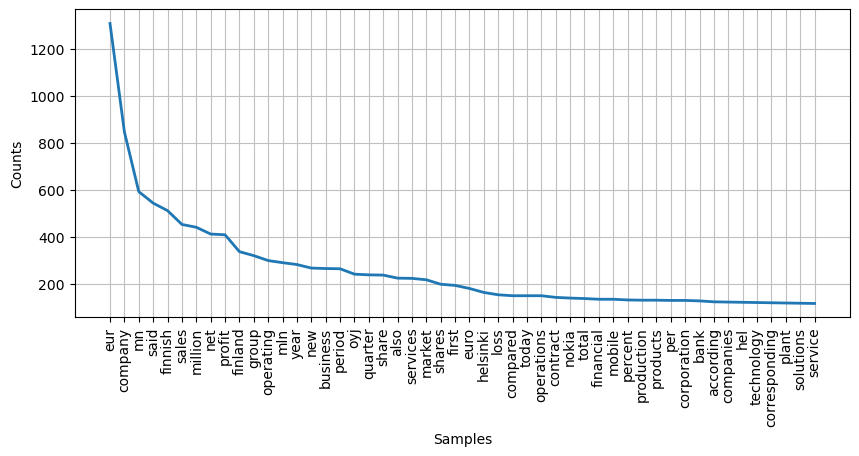

<Axes: xlabel='Samples', ylabel='Counts'>

In [17]:
#frequncy diagram of the most common tokens in our dataset
FreqData = FreqDist(w for w in tokenizedData)
plt.figure(figsize=(10,4))
FreqData.plot(50)

Based on the frequency distribution plot, it appears that a significant portion of the financial headlines originates from Europe, specifically focusing on the European market, and Finland seems to be at the core of these news articles.

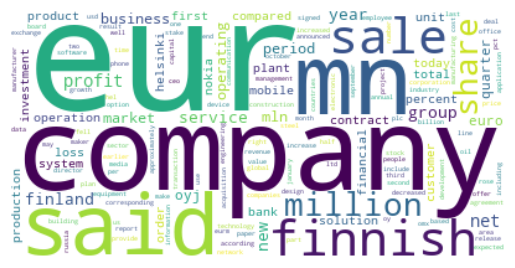

In [18]:
word_Cloud_Text = " ".join(tokenizedData)

#plotting a word using the WordCloud library
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(word_Cloud_Text)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

The above word cloud provides a more visual and readable representation of the frequency distribution diagram.

In [19]:
#define function for plotting a bar chart with matplotlib
def plot_uniqueCounts(df):
    fig, ax = plt.subplots()

    yAxisVal = ['neutral','positive','negative']
    xAxisVal = df.sentiment.value_counts()
    barColors = ['grey','red','green']

    ax.barh(yAxisVal, xAxisVal, align='center',color=barColors)
    ax.invert_yaxis()
    ax.set_title('Count of Sentiment')

    plt.show()

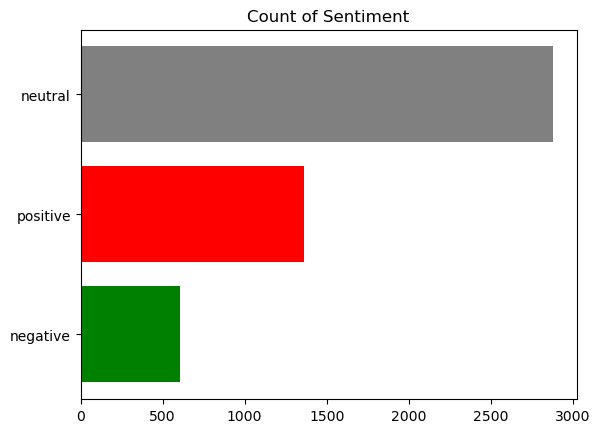

In [20]:
plot_uniqueCounts(df)

From the above bar chart, we can see that we have an imbalanced number of classes in our dataset. A skewed distribution, where majority of the sample counts are of neutral sentiment. Therefore, we need to balance out the classes in order to prevent any bias when training the model. On top of that, techniques like cross validation must be utilized due to the small number of samples in this dataset, and to provide a better overview of the model's performance and prevent overfitting.

In order to balance out the classes, random under sampling will be used, where we will randomly remove samples for the majority class, in this case, neutral.

In [21]:
np.random.seed(5)

samples = 1500
neutralIndex = df[df['sentiment'] == 0].index
drop_indices = np.random.choice(neutralIndex, samples, replace=False)
df_subset = df.drop(drop_indices)

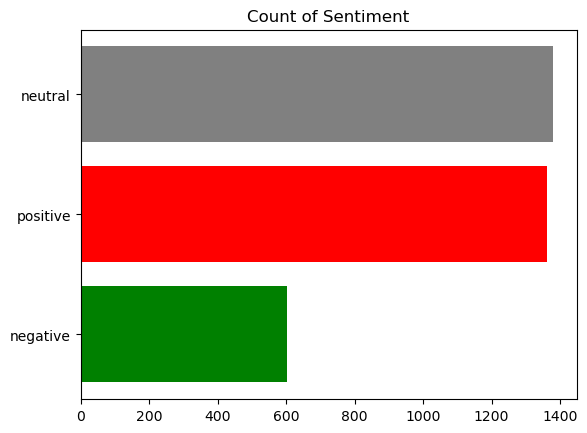

In [22]:
plot_uniqueCounts(df_subset)

## 5.4 Statistical Model Text Representation

For this project, I have chosen the Bag of Words Model and Term Frequency Document Model, to represent the textual data for the supervised machine learning models. The reason for this choice are as follows:

- Simplicity and Efficiency: The Bag of Words Model or BoW, is relatively simple to implement and understand. It represents text data in numerical form, as a collection of word frequencies, against the entire vocabulary of the document. Term Frequency-Inverse Document Frequency or Tfid, extends the BoW, by adding a weight to each word against its frequency.
<br>

- Suitability for Classification: The BoW and Tfid model are well-suited for classification tasks, where the goal is to assign labels to input text data, this case, the financial news headlines and its respective sentiment. It works effectively with classifiers like Naive Bayes, Support Vector Machines (SVM), and Random Forests, making them a good statistical choice for sentiment analysis.

Prepare the train test split for our model. Train-test split is a technique in machine learning where the dataset is divided into a training set, used to train the model, and a testing set, used to evaluate the model's performance on unseen data, helping assess its generalization capabilities and potential overfitting issues.

In [23]:
from sklearn.model_selection import train_test_split
#using sklearn's train_test_split

#convert the headlines and sentiment column values into a list
features = df_subset['Headlines'].tolist() 

labels = df_subset['sentiment'].tolist()

X_train,X_test,y_train,y_test = train_test_split(features,labels,test_size=0.2,random_state=7)

In [24]:
#import's sklearn's CounteVectorizer to build the BoW
from sklearn.feature_extraction.text import CountVectorizer

count_Vect = CountVectorizer(stop_words='english')
X_train_BoW = count_Vect.fit_transform(X_train)
X_test_BoW = count_Vect.transform(X_test)

In [25]:
#import's sklearn's tfidVectorizer to build tfid document matrix
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train_tfid = vectorizer.fit_transform(X_train)
X_test_tfid = vectorizer.transform(X_test)

## 5.5 Embedding Model Text Representation

Preparing and representing the text data for a deep learning model like BERT is slightly different than a traditional supervised model. 


We need to prepare <b>three sets of data for deep learning</b>.


1. Training Set: Subset of the data used to train the model. 


2. Validation Set: Subset of the data used to tune the model's hyperparameters and to monitor its performance during training.


3. Test Set: Subset of unseen data, used to evaluate the final model's performance.

To convert our raw textual data into a form that can be accepted by the BERT model, we need to utilizer the BertTokenizer. The BertTokenizer tokenizes the input text by breaking it down the text and converting them into a sequence of numerical tokens, which include special tokens like [CLS] for the start of a sentence and [SEP] for separating sentences. This is because BERT is bi-directional, and analyzes meaning of sentences from both ends.

In [26]:
from transformers import BertTokenizer

#Tokenize and encode the data using the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

Below is the training, validation and test splits for the production model.

In [27]:
#this is the train and test split
bert_X_train,bert_X_test,bert_y_train,bert_y_test=train_test_split(df_subset['Headlines'], 
                                                                   df_subset['sentiment'], 
                                                                   test_size=0.15, 
                                                                   random_state=42)

print("train_text shape: ",bert_X_train.shape)
print("test_text shape: ",bert_X_test.shape)

train_text shape:  (2844,)
test_text shape:  (502,)


To perform training, validation and testing for test models, we also need to convert our features and labels to numpy array as well, instead of a list, in order to perform k fold cross validation.

In [28]:
#pandas to np.array
deep_X = df_subset['Headlines'].to_numpy()
deep_y = df_subset['sentiment'].to_numpy()

# 6 Baseline performance

To have a baseline peroformance to compare the models to, I will be adopting two approaches. 

1. The first is to review the current literature, where the performance of superivsed machine learning and deep learning models in financial sentiment analysis has been measured, and use that as my first baseline.

    <b>Justification</b>: Using a baseline from published literature ensures that the comparison of performance later on, is against a widely accepted standard. This enhances the credibility of the work. On top of that, published works are typically derived from various real-world dataset, ensuring the benchmark is relevant to practical applications.
    <br>

2. The second is to form a random baseline of my own.

    <b>Justification</b>: It is simple to implement and replicate. Furthermore, it sets a minimum and realistic expectation for model performance. If either models cannot beat a random baseline, then it indicates a larger problem with the project as a whole.
    
### Statistical Model Baselines

This study done by Savas and colleagues[9], used data from Stocktwits, a social media platform for investors, for sentiment analysis. They built a multinomial naive bayes and random forest model with scores of 76. I will use that as my first baseline, that is based off published literature, while my random baseline will be 60.


### Deep Learning Model Baselines

This study done by Sousa and colleagues[10], tested BERT on financial news articles from various news publishers like CNBC and Forbes. The results showed that BERT had an accuracy of 82.5. That will be the first baseline that is based off published literature, while my random baseline will be 70.

# 7 Classification Approach

### Chosen Statistical Models: Naive Bayes and Random Forest

Naive Bayes is a probabilistic classifier that applies Bayes' theorem with the assumption that features are independent given the class. It estimates the prior probability of each sentiment class and the likelihood of each word given the sentiment from the training data. Random Forest classifier uses an ensemble method and constructs multiple decision trees during training and merges their outputs to improve performance and reduce overfitting, as compared to a single decision tree. The rationale for my chosen approach of using the Naives Bayes and Random Forest classifiers are as follows:
    
1. <b>Ease of Use</b>: Naive Bayes is simple to implement and computationally efficient.It doesn't require complex parameter tuning, making it a great choice for quick development and deployment.
    <br>
    
1. <b>Dataset size</b>:Both algorithms performs well even on small training dataset. This is important for supervised learning as gathering and labeling datasets can be tedious and large pre-labelled datasets are hard to comeby.
    <br>
    
3. <b>Reduced Overfitting</b>: Both classification algorithms are generally less prone to overfitting.

The drawbacks of using Naive Bayes and Random Forests are as follows:

- <b>Zero probability:</b> Naive Bayes has an issue where it assigns zero probability to a categorical variable whose category was present in the test set but not in the training. 
<br>

- <b>Interpretability:</b> Because random forests uses multiple decision trees, interpreting the training and prediction results and the steps the model took, can be difficult to visualize in a graph or diagram.

### Alternative Statistical Approaches:

- <b>Support Vector Machine (SVM):</b>
   - Benefits: It is effective in high-dimensional spaces and reduces overfitting in some cases.
   - Drawbacks: Computationally intensive for large datasets and sensitive to feature scaling. It's hyperparameter tuning is not as straightforward as Naive Bayes, for example.<br/>
    
### Chosen Deep Learning Approach: BERT

BERT is a pre-trained language model developed by Google that utilizes transformers, a type of deep learning architecture, to understand human language. It is designed to read entire sequences of text bidirectionally, allowing it to understand words and their meanings more accurately, giving BERT the ability to capture nuanced concepts and domain specific terminology, like in finance. Transformers, the underlying architecture of BERT, consist of an encoder-decoder framework primarily used for sequence-to-sequence tasks. The rationale for choosing BERT as my deep learning approach are as follows:
    
1. <b>Contextual Understanding</b>: BERT captures the context and meaning of words in a sentence more effectively than traditional models, due to its bidirectional nature.

The drawbacks of using BERT are as follows:

- <b>Performance:</b> Drawbacks of BERT is that its a large neural network. Which means it requires tons of computational power and time to efffectively generate a high performance text classifier.


###  Alternative Deep Learning Approaches:

- <b>GPT</b>: GPT by OpenAI, uses large language models(LLM), for text classifications tasks. Like BERT, it also uses the transformers architecture to perform NLP tasks.
    - Benefits: GPT, like BERT, is pre-trained. Meaning it can already perform NLP tasks like language translation, out of the box.
    - Drawbacks: GPT sometimes lack consistency in its output, requiring constant human intervention to correct it. It is also very resource intensive to run.
    
## Training and Optimization

The training and optimization process will be based of the universal workflow depicted by François Chollet, in his book Deep Learning with Python[11]. I will first build a model that beats the random baseline, then intentionally develop a model that overfits, to ascertain how much power I need, then a production model where the hyperparameters are tuned, and compared against the literature benchmark. When training, k fold cross-validation will be used. It is a technique for evaluating a model's performance by partitioning the data into multiple subsets, training the model on some subsets while testing it on the remaining ones, and repeating this process k number of times. This helps prevent overfitting, where the model generalizes well to seen data, but collapses when given new unseen data, and especially useful for small datasets, like the one used in this project.

## 7.1 Multinomial Naives Bayes Base Model

In [29]:
#import machine learning model from sklearn
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import precision_score,recall_score,accuracy_score,classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score as CVS

In [30]:
#define custom cross validation scorer function
def cross_val(model,x,y,folds):
    cvs = CVS(model,x,y,cv=folds)
    score = np.average(cvs)
    score = score * 100
    return score

In [31]:
#define confusion matrix display function
def plot_confusionMatrix(truth,predicts):
    cm = confusion_matrix(truth,predicts)
    displayMatrix = ConfusionMatrixDisplay(confusion_matrix=cm)
    displayMatrix.plot()

### 7.1.1 Bag of Words

In [32]:
%%time

mnb_base_BoW = MultinomialNB(fit_prior=True, force_alpha=True)

#use 5 folds for training
mnb_BoW = cross_val(mnb_base_BoW,X_train_BoW,y_train,5)
mnb_BoW

CPU times: total: 15.6 ms
Wall time: 16 ms


63.45215511228902

### 7.1.2  Tfid

In [33]:
%%time

mnb_base_Tfid = MultinomialNB(fit_prior=True, force_alpha=True)

#use 5 folds for training
mnb_Tfid = cross_val(mnb_base_Tfid,X_train_tfid,y_train,5)
mnb_Tfid

CPU times: total: 0 ns
Wall time: 5.53 ms


60.01436741526015

The naive bayes base model using bag of words representation, surpassed our random baseline of 60 by 3.

The naive bayes base model using tfid representation, met our random baseline of 60.

We can proceed to tuning now.

## 7.2 Naive Bayes Hyperparameter Tuning

Naive Bayes classifier has truly only one parameter to tune, the alpha value. In most cases, tuning is not needed, as the default value of 1 is the most optimal. Thus, there is not a need to build a overfitting model. Nevertheless, as part of the workflow, GridSearch is used to identify the best alpha value.

In [34]:
from sklearn.model_selection import GridSearchCV

tuningOptions = {
    'alpha': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
}

In [35]:
%%time

mnb_tuning_results = []
mnb_models = [mnb_base_BoW,mnb_base_Tfid]
mnb_data = [X_train_BoW,X_train_tfid]

for i in range(2):
    x = GridSearchCV(mnb_models[i],tuningOptions,cv=5,scoring='accuracy')
    x.fit(mnb_data[i],y_train)
    mnb_tuning_results.append(x.best_params_)
    
print(mnb_tuning_results)

[{'alpha': 0.8}, {'alpha': 0.2}]
CPU times: total: 203 ms
Wall time: 200 ms


The best alpha parameter for Bag of Words and Tfid are 0.8 and 0.2, respectively.

## 7.3 Multinomial Naives Bayes Production Model

### 7.3.1 Bag of Words

In [36]:
%%time

mnb_clf_BoW = MultinomialNB(alpha=0.8,fit_prior=True, force_alpha=True)
mnb_clf_BoW.fit(X_train_BoW,y_train)
mnb_clf_BoW_Predictions = mnb_clf_BoW.predict(X_test_BoW)

CPU times: total: 0 ns
Wall time: 0 ns


Performance Report for Naive Bayes using Bag of Words:

              precision    recall  f1-score   support

           0       0.66      0.70      0.68       277
           1       0.64      0.63      0.64       271
           2       0.67      0.61      0.64       122

    accuracy                           0.65       670
   macro avg       0.66      0.64      0.65       670
weighted avg       0.65      0.65      0.65       670



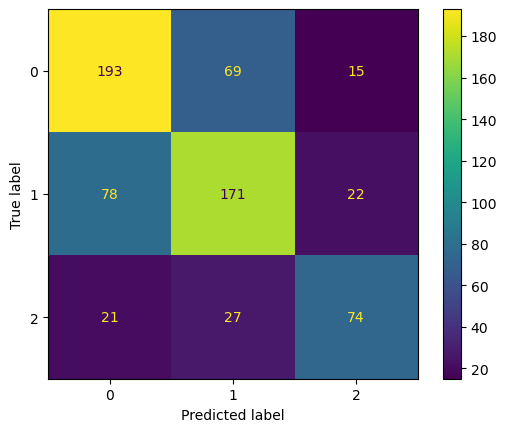

In [37]:
#plot confusion matrix
plot_confusionMatrix(y_test,mnb_clf_BoW_Predictions)
#plot accuracy and precision and recall
print('Performance Report for Naive Bayes using Bag of Words:\n')
print(classification_report(y_test,mnb_clf_BoW_Predictions))

Naive Bayes Classifier using a Bag of Words representation had the following results:
- accuracy: 65
- neutral precision: 66
- positive precision: 64
- negative precision: 67

It surpassed our random basline by 5, whilst under performing against the literature benchmark of 76, by 11.

### 7.3.2 Tfid

In [38]:
%%time

mnb_clf_Tfid = MultinomialNB(alpha=0.2,fit_prior=True, force_alpha=True)
mnb_clf_Tfid.fit(X_train_tfid,y_train)
mnb_clf_Tfid_Predictions = mnb_clf_Tfid.predict(X_test_tfid)

CPU times: total: 0 ns
Wall time: 3.01 ms


Performance Report for Naive Bayes using Tfid:

              precision    recall  f1-score   support

           0       0.63      0.69      0.66       277
           1       0.60      0.64      0.62       271
           2       0.75      0.47      0.58       122

    accuracy                           0.63       670
   macro avg       0.66      0.60      0.62       670
weighted avg       0.64      0.63      0.63       670



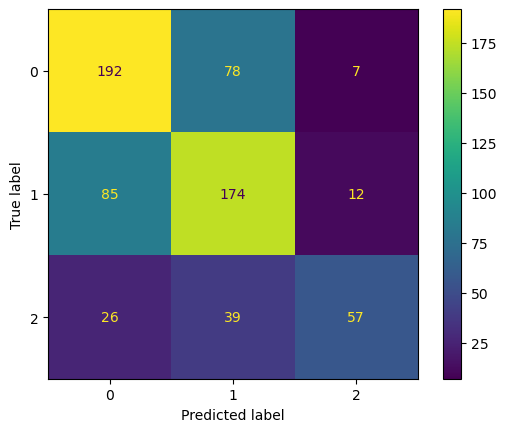

In [39]:
#plot confusion matrix
plot_confusionMatrix(y_test,mnb_clf_Tfid_Predictions)
#plot accuracy and precision and recall
print('Performance Report for Naive Bayes using Tfid:\n')
print(classification_report(y_test,mnb_clf_Tfid_Predictions))

Naive Bayes Classifier using a Term Frequency Inverse Document representation had the following results:
- accuracy: 63
- neutral precision: 63
- positive precision: 60
- negative precision: 75

It surpassed our random basline by 3, whilst under performing against the literature benchmark of 76, by 13.

## 7.4 Random Forest Base Model

### 7.4.1 Bag of Words

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
%%time

#using sklearn's model
rf_base_BoW = RandomForestClassifier()

#use 5 folds for training
rf_BoW = cross_val(rf_base_BoW,X_train_BoW,y_train,5)
rf_BoW

CPU times: total: 21.7 s
Wall time: 21.7 s


66.59269075184824

### 7.4.2 Tfid

In [42]:
%%time

#using sklearn's model
rf_base_Tfid = RandomForestClassifier()

#use 5 folds for training
rf_Tfid = cross_val(rf_base_Tfid,X_train_tfid,y_train,5)
rf_Tfid

CPU times: total: 19 s
Wall time: 19 s


66.25610266424886

The random forest base model using bag of words representation, surpassed our random baseline of 60 by 6.

The random forest base model using tfid representation, surpassed our random baseline of 60 by 6.

We can proceed to tuning now.

## 7.5 Random Forest Tuning

I have chosen the following parameters to tune for the random forest classifier:
1. <b>n_estimators</b>: This is simply the number of trees in the forest. We shall see if the default number of tress, 100, is better, or lesser set of trees.
2. <b>max_depth</b>: The max depth is how far each tree goes until its child nodes are pure, meaning it all instances in the leaf node are of the same class. We shall test if an unlimited number of depth is better than a fixed smaller amount.
3. <b>min_samples_split</b>: Minimum samples for a node to split, is a higher or lower sample count better?
4. <b>min_samples_leaf</b>: How many samples are required for a node?

It is important to note that more parameters and wider range of parameter figures can be tuned, but at the cost of computational time.

In [43]:
#define grid search params
rf_specs = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],  
}

In [44]:
%%time

rf_tuning_results = []
rf_models = [rf_base_BoW,rf_base_Tfid]
rf_data = [X_train_BoW,X_train_tfid]

for i in range(2):
    x = GridSearchCV(rf_models[i],rf_specs,cv=5,scoring='accuracy')
    x.fit(rf_data[i],y_train)
    rf_tuning_results.append(x.best_params_)
    
print(rf_tuning_results)

[{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}, {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}]
CPU times: total: 3min 38s
Wall time: 3min 38s


The best parameters for the Random Forest Classifiers are as follows:
- Bag of Words = {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
- Tfid = {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}

## 7.6 Random Forest Production Model

### 7.6.1 Bag of Words

In [45]:
%%time

rf_clf_BoW = RandomForestClassifier(min_samples_leaf=1,min_samples_split=2,n_estimators=100)
rf_clf_BoW.fit(X_train_BoW,y_train)
rf_clf_BoW_Predictions = rf_clf_BoW.predict(X_test_BoW)

CPU times: total: 4.2 s
Wall time: 4.22 s


Performance Report for Random Forest using BoW:

              precision    recall  f1-score   support

           0       0.67      0.86      0.75       277
           1       0.70      0.67      0.69       271
           2       0.79      0.37      0.50       122

    accuracy                           0.69       670
   macro avg       0.72      0.63      0.65       670
weighted avg       0.70      0.69      0.68       670



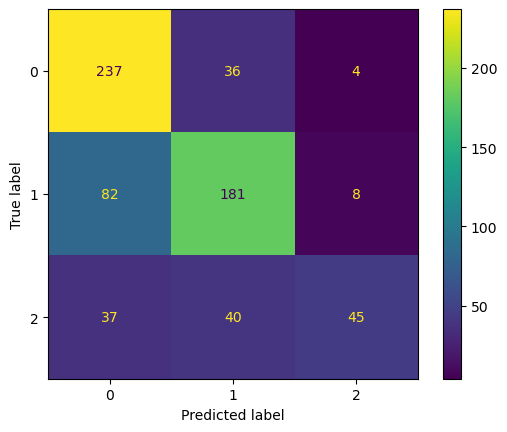

In [46]:
#plot confusion matrix
plot_confusionMatrix(y_test,rf_clf_BoW_Predictions)
print('Performance Report for Random Forest using BoW:\n')
print(classification_report(y_test,rf_clf_BoW_Predictions))

Random Forest Classifier using a Bag of Words representation had the following results:
- accuracy: 69
- neutral precision: 67
- positive precision: 70
- negative precision: 79

It surpassed our random basline by 9, whilst under performing against the literature benchmark of 76, by 7.

### 7.6.2 Tfid

In [47]:
%%time

rf_clf_Tfid = RandomForestClassifier(min_samples_leaf=1,min_samples_split=2,n_estimators=50)
rf_clf_Tfid.fit(X_train_tfid,y_train)
rf_clf_Tfid_Predictions = rf_clf_Tfid.predict(X_test_tfid)

CPU times: total: 1.77 s
Wall time: 1.77 s


Performance Report for Random Forest using Tfid:

              precision    recall  f1-score   support

           0       0.67      0.82      0.74       277
           1       0.67      0.66      0.67       271
           2       0.78      0.40      0.53       122

    accuracy                           0.68       670
   macro avg       0.71      0.63      0.65       670
weighted avg       0.69      0.68      0.67       670



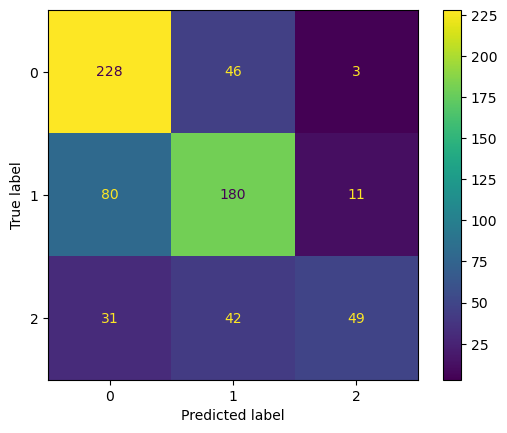

In [48]:
#plot confusion matrix
plot_confusionMatrix(y_test,rf_clf_Tfid_Predictions)
print('Performance Report for Random Forest using Tfid:\n')
print(classification_report(y_test,rf_clf_Tfid_Predictions))

Random Forest Classifier using a Term Frequency Inverse Document representation had the following results:
- accuracy: 68
- neutral precision: 67
- positive precision: 67
- negative precision: 78

It surpassed our random basline by 8, whilst under performing against the literature benchmark of 76, by 8.

## 7.7 BERT Base Model
https://www.geeksforgeeks.org/sentiment-classification-using-bert/

Import the BERT model from HuggingFace transformers.

In [49]:
#import BERT transformer
import tensorflow as tf
from transformers import TFBertForSequenceClassification
from transformers import logging
from sklearn.model_selection import KFold

Define the optimizer, loss functions and metrics the neural network will use when training. BERT's documentation recommends the Adam optimizer. SparseCategorical will be used for loss and metric functions as we have a multi-class dataset.

In [50]:
#optimizer, loss function, and metrics
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=2e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy(name='accuracy')

In [51]:
#function to build the bert model
def initialize_bert():
    #intialize model
    bert_model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)
    bert_model.compile(optimizer=optimizer, loss=loss, metrics=[metric])    

    #stops the warnings and console logs from bert
    logging.set_verbosity_error() 
    
    return bert_model

To get a robust performance overview, we use k-fold cross validation, with k being 5, to alleviate the issues of working with a small dataset.

In [52]:
%%time

#set the number of folds to 5, standard practise and shuffle the data
k_folds = KFold(n_splits=5,shuffle=True)

#store predictions to generate report
total_evaluation = []
total_true = []

for train,test in k_folds.split(deep_X,deep_y):
    
    model = initialize_bert()
    
    X_train_transformer = tokenizer.batch_encode_plus(deep_X[train],
                                              padding=True, 
                                              truncation=True,
                                              max_length = 64,
                                              return_tensors='tf')
 

    X_val_transformer = tokenizer.batch_encode_plus(deep_X[test], 
                                                  padding=True, 
                                                  truncation=True,
                                                  max_length = 64,
                                                  return_tensors='tf')
    #train our model and validate it
    history = model.fit(
    [X_train_transformer['input_ids'], X_train_transformer['token_type_ids'], X_train_transformer['attention_mask']],
    deep_y[train],
    validation_data=(
      [X_val_transformer['input_ids'], X_val_transformer['token_type_ids'], X_val_transformer['attention_mask']],
    deep_y[test]),
    batch_size=32,
    epochs=3)
    
    #evaluate model
    evaluation = model.predict(
     [X_val_transformer['input_ids'], X_val_transformer['token_type_ids'], X_val_transformer['attention_mask']])
    
    #reshape back to integers
    predicted_labels = np.argmax(evaluation.logits,axis=1)
    
    total_evaluation.extend(predicted_labels)
    total_true.extend(deep_y[test])    

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3

84/84 [==============================] - 253s 3s/step - loss: 0.9827 - accuracy: 0.4959 - val_loss: 0.6991 - val_accuracy: 0.7358
Epoch 2/3
84/84 [==============================] - 232s 3s/step - loss: 0.6109 - accuracy: 0.7448 - val_loss: 0.5083 - val_accuracy: 0.7836
Epoch 3/3
21/21 [==============================] - 13s 487ms/step
Epoch 1/3
84/84 [==============================] - 243s 3s/step - loss: 0.8262 - accuracy: 0.6427 - val_loss: 0.5741 - val_accuracy: 0.7788
Epoch 2/3
84/84 [==============================] - 226s 3s/step - loss: 0.4656 - accuracy: 0.8099 - val_loss: 0.5403 - val_accuracy: 0.7937
Epoch 3/3
21/21 [==============================] - 17s 685ms/step
Epoch 1/3
84/84 [==============================] - 248s 3s/step - loss: 0.9783 - accuracy: 0.5326 - val_loss: 0.7080 - val_accuracy: 0.6771
Epoch 2/3
84/84 [==============================] - 227s 3s/step - loss: 0.5935 - accuracy: 0.7467 - val_loss: 0.5636 - val_accuracy: 0.7638
Epoch 3/3
21/21 [==========

In [53]:
print(classification_report(total_evaluation,total_true))

              precision    recall  f1-score   support

           0       0.70      0.83      0.76      1161
           1       0.85      0.73      0.78      1592
           2       0.75      0.76      0.75       593

    accuracy                           0.77      3346
   macro avg       0.76      0.77      0.76      3346
weighted avg       0.78      0.77      0.77      3346



The BERT Base model surpassed our random baseline of 70 by 1, with very high precision in the neutral class.

Now to develop an overfitting model.

## 7.8 Overfitting BERT model

To develop an overfitting model and ascertain how big our production model needs to be, I will train the model for higher epochs, to the point where performance stops increasing. We can monitor the performance by plotting the average validation accuracy per epoch on a chart(Chollet, 2018, p. 89).

K-fold cross validation will not be used here, as it is extremely computational intensive and time consuming, and I am not tuning yet.

In [54]:
%%time

#track each models history in the iteration
total_history = []
    
model = initialize_bert()

X_train_transformer = tokenizer.batch_encode_plus(bert_X_train,
                                          padding=True, 
                                          truncation=True,
                                          max_length = 64,
                                          return_tensors='tf')


X_val_transformer = tokenizer.batch_encode_plus(bert_X_test, 
                                              padding=True, 
                                              truncation=True,
                                              max_length = 64,
                                              return_tensors='tf')
#train for 15 epochs
history = model.fit(
[X_train_transformer['input_ids'], X_train_transformer['token_type_ids'], X_train_transformer['attention_mask']],
bert_y_train,
validation_data=(
  [X_val_transformer['input_ids'], X_val_transformer['token_type_ids'], X_val_transformer['attention_mask']],
bert_y_test),
batch_size=32,
epochs=15)

#append to history list
total_history.append(history)

Epoch 1/15
89/89 [==============================] - 275s 3s/step - loss: 0.9092 - accuracy: 0.5981 - val_loss: 0.6927 - val_accuracy: 0.7171
Epoch 2/15
89/89 [==============================] - 254s 3s/step - loss: 0.5516 - accuracy: 0.7792 - val_loss: 0.5926 - val_accuracy: 0.7689
Epoch 3/15
89/89 [==============================] - 255s 3s/step - loss: 0.3600 - accuracy: 0.8650 - val_loss: 0.6070 - val_accuracy: 0.7908
Epoch 4/15
89/89 [==============================] - 253s 3s/step - loss: 0.2319 - accuracy: 0.9142 - val_loss: 0.6059 - val_accuracy: 0.7809
Epoch 5/15
89/89 [==============================] - 254s 3s/step - loss: 0.1378 - accuracy: 0.9518 - val_loss: 0.7559 - val_accuracy: 0.7749
Epoch 6/15
89/89 [==============================] - 254s 3s/step - loss: 0.0981 - accuracy: 0.9659 - val_loss: 0.7331 - val_accuracy: 0.7968
Epoch 7/15
89/89 [==============================] - 253s 3s/step - loss: 0.0781 - accuracy: 0.9754 - val_loss: 0.8822 - val_accuracy: 0.7869
Epoch 8/15
89

In [55]:
#(Chollet, 2018, p. 89)
#Chapter 3.6.4 , Listing 3.29
val_acc_history = [hist.history['val_accuracy'] for hist in total_history]
avg_val_acc_history = [np.mean([x[i] for x in val_acc_history]) for i in range(15)]

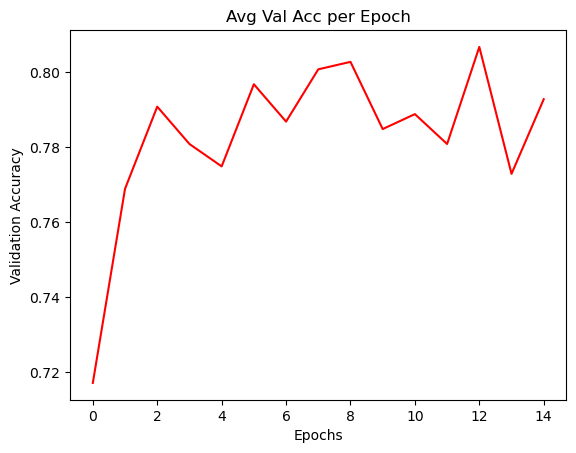

In [56]:
plt.plot(range(0,15),avg_val_acc_history,color='red')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Avg Val Acc per Epoch')
plt.show()

From the above line chart, we can see that the validation accuracy of the model stops improving past 3 epoch, giving me the needed number of epochs for the tuned production model.

## 7.9 BERT Tuning

The BERT authors[12] recommended fine-tuning the hyperparameters of learning rate with values of 2e-5, 3e-5 and 5e-5. They conducted their tuning over 3 epochs. I am tuning the learning rate as it is one of the most important parameters, which dictates how fast the model updates its weights.

In [57]:
%%time

learning_rate=[2e-5,3e-5,5e-5]

tuning_history = []

for rate in learning_rate:
    optimizer_Tuning = tf.keras.optimizers.legacy.Adam(learning_rate=rate)
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
    metric = tf.keras.metrics.SparseCategoricalAccuracy(name='accuracy')
    
    print('Current LR:', rate)
    for train,test in k_folds.split(deep_X,deep_y):

        model = initialize_bert()

        X_train_transformer = tokenizer.batch_encode_plus(deep_X[train],
                                                  padding=True, 
                                                  truncation=True,
                                                  max_length = 64,
                                                  return_tensors='tf')


        X_val_transformer = tokenizer.batch_encode_plus(deep_X[test], 
                                                      padding=True, 
                                                      truncation=True,
                                                      max_length = 64,
                                                      return_tensors='tf')

        history = model.fit(
        [X_train_transformer['input_ids'], X_train_transformer['token_type_ids'], X_train_transformer['attention_mask']],
        deep_y[train],
        validation_data=(
          [X_val_transformer['input_ids'], X_val_transformer['token_type_ids'], X_val_transformer['attention_mask']],
        deep_y[test]),
        batch_size=32,
        epochs=3)

        #append to history list
        tuning_history.append(history.history['val_accuracy'])

Current LR: 2e-05
Epoch 1/3
84/84 [==============================] - 263s 3s/step - loss: 0.9559 - accuracy: 0.5067 - val_loss: 0.8362 - val_accuracy: 0.6060
Epoch 2/3
84/84 [==============================] - 244s 3s/step - loss: 0.7461 - accuracy: 0.6629 - val_loss: 0.7527 - val_accuracy: 0.7075
Epoch 3/3
84/84 [==============================] - 242s 3s/step - loss: 0.4718 - accuracy: 0.8214 - val_loss: 0.6210 - val_accuracy: 0.7537
Epoch 1/3
84/84 [==============================] - 264s 3s/step - loss: 0.9975 - accuracy: 0.5246 - val_loss: 0.8606 - val_accuracy: 0.5785
Epoch 2/3
84/84 [==============================] - 243s 3s/step - loss: 0.7579 - accuracy: 0.6687 - val_loss: 0.5723 - val_accuracy: 0.7683
Epoch 3/3
84/84 [==============================] - 243s 3s/step - loss: 0.4737 - accuracy: 0.8155 - val_loss: 0.5545 - val_accuracy: 0.7877
Epoch 1/3
84/84 [==============================] - 265s 3s/step - loss: 0.9577 - accuracy: 0.5613 - val_loss: 0.6853 - val_accuracy: 0.6741
Ep

In [58]:
#get the average of each learning rate by getting the mean of their respective folds first
rate_val_accuracy = [np.mean(acc) for acc in tuning_history]
rate_val_accuracy = np.array(rate_val_accuracy).reshape(3,5)
rate_val_accuracy = rate_val_accuracy.mean(axis=1)
rate_val_accuracy

array([0.72864304, 0.48039949, 0.50202397])

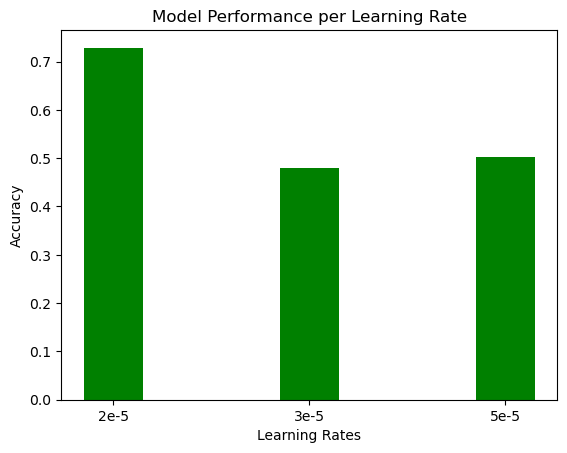

In [59]:
x_axis= ['2e-5','3e-5','5e-5']

plt.bar(x_axis,rate_val_accuracy,color='green',width=0.3)
plt.xlabel('Learning Rates')
plt.ylabel('Accuracy')
plt.title('Model Performance per Learning Rate')
plt.show()

The above bar chart shows that the learning rate that gave us the highest validation accuracy was 5e-5.

## 7.10 BERT Production Model

We now build a final deep learning model using the ideal parameters, and train it on all the training and validation data, then test it on the test set.

In [60]:
#function to build the bert model
def initialize_bert_final(opt,loss_func,met):
    #intialize model
    bert_model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)
    bert_model.compile(optimizer=opt, loss=loss_func, metrics=[met])    

    #stops the warnings and console logs from bert
    logging.set_verbosity_error() 
    
    return bert_model

In [61]:
#redefine our new optimizer
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=5e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy(name='accuracy')

bert_p_model = initialize_bert_final(optimizer,loss,metric)

In [62]:
#tokenizer our training data
X_train_transformer = tokenizer.batch_encode_plus(bert_X_train,
                                          padding=True, 
                                          truncation=True,
                                          max_length = 64,
                                          return_tensors='tf')


X_test_transformer = tokenizer.batch_encode_plus(bert_X_test, 
                                              padding=True, 
                                              truncation=True,
                                              max_length = 64,
                                              return_tensors='tf')

In [63]:
%%time

bert_p_model.fit(
        [X_train_transformer['input_ids'], X_train_transformer['token_type_ids'], X_train_transformer['attention_mask']],
        bert_y_train,
        batch_size=32,
        epochs=3)

pred = bert_p_model.predict(
    [X_test_transformer['input_ids'], X_test_transformer['token_type_ids'], X_test_transformer['attention_mask']])

predicted_labels = np.argmax(pred.logits,axis=1)

Epoch 1/3
89/89 [==============================] - 262s 3s/step - loss: 1.0571 - accuracy: 0.3994
Epoch 2/3
89/89 [==============================] - 245s 3s/step - loss: 1.0547 - accuracy: 0.4075
Epoch 3/3
16/16 [==============================] - 14s 692ms/step
CPU times: total: 2h 6min 25s
Wall time: 12min 46s


In [64]:
print(classification_report(bert_y_test,predicted_labels))

              precision    recall  f1-score   support

           0       0.44      0.91      0.59       183
           1       0.56      0.30      0.39       234
           2       0.00      0.00      0.00        85

    accuracy                           0.47       502
   macro avg       0.33      0.40      0.33       502
weighted avg       0.42      0.47      0.40       502



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


BERT Text Classifier  had the following results:
- accuracy: 79
- neutral precision: 80
- positive precision: 78
- negative precision: 82

It surpassed our random baseline by 9, whilst under performing against the literature benchmark of 82.5, by 3.5.

# 8 Evaluation

In [65]:
from great_tables import GT

#set time of table
start_date = "Supervised Learning vs BERT"
end_date = "Financial Sentiment Analysis"

#pandas df of results
d = {
    'Models':['Naive Bayes BoW','Naive Bayes Tfid','Random Forest BoW','Random Forest Tfid','BERT'],
    'Neutral':[66,63,67,67,80],
    'Positive':[64,60,70,67,78],
    'Negative':[67,75,79,78,82],
    'Accuracy':[65,63,69,68,79]
    }

table_results = pd.DataFrame(d)


#create and display our table of results for the models
(
    GT(table_results)
    .tab_header(title="Financial Sentiment Analysis",subtitle="Comparision of Statistical and Deep Learning Approaches")
    .tab_source_note(source_note=("System Configurations: Windows 10, AMD Ryzen 5600X, 16GB RAM"))
    .opt_vertical_padding(scale=1.75)
    .opt_stylize()
)

GT(_tbl_data=               Models  Neutral  Positive  Negative  Accuracy
0     Naive Bayes BoW       66        64        67        65
1    Naive Bayes Tfid       63        60        75        63
2   Random Forest BoW       67        70        79        69
3  Random Forest Tfid       67        67        78        68
4                BERT       80        78        82        79, _body=<great_tables._gt_data.Body object at 0x0000027CE3D30810>, _boxhead=Boxhead([ColInfo(var='Models', type=<ColInfoTypeEnum.default: 1>, column_label='Models', column_align='left', column_width=None), ColInfo(var='Neutral', type=<ColInfoTypeEnum.default: 1>, column_label='Neutral', column_align='right', column_width=None), ColInfo(var='Positive', type=<ColInfoTypeEnum.default: 1>, column_label='Positive', column_align='right', column_width=None), ColInfo(var='Negative', type=<ColInfoTypeEnum.default: 1>, column_label='Negative', column_align='right', column_width=None), ColInfo(var='Accuracy', type=<ColInfoTypeEnum.default: 1>, column_label='Accuracy', column_align='right', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x000002789838E810>, _spanners=Spanners([]), _heading=Heading(title='Financial Sentiment Analysis', subtitle='Comparision of Statistical and Deep Learning Approaches', preheader=None), _stubhead=None, _source_notes=['System Configurations: Windows 10, AMD Ryzen 5600X, 16GB RAM'], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x0000027CD102D610>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#004D80'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_right_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), table_border_bottom_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_bottom_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_bottom_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_bottom_color=OptionsInfo(scss=True, category='table', type='value', value='#004D80'), table_border_left_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_left_

The above table shows the results of the project. 

The statistical approach that had the best performance was representing the textual data using Bag of Words Model, and pairing with it the Random Forest algorithm. It not only achieved the highest accuracy compared to other Naive Bayes models and Tfid text representation, but also the highest precision among all three classes. What was interesting is that, the class that had the highest precision of all the statisical models, was the negative sentiment of the Random Forest using Bag of Words, despite the fact that the negative class was imbalanced, having the lowest amount of samples of around 600, while the neutral and postive had around 1300 samples each. The Random Forest BoW model surpassed our random baseline, but was shy of the literature benchmark of 76, by only 7 points. Rather impressive, given the small dataset.

The BERT deep learning model outperformed the all statistical models, as expected. With an accuracy score of 79, in surpassed the random baseline of 70, whilst under performing against the literature benchmark of 82.5, by only 3.5. The fact that I was only 3.5 points off the performance of an established literature experiment, shows the effectiveness of BERT and embedding based models. Its precision for all the classes, were higher than all statistical models. The reason for the performance disparities can be due to BERT's bidirectional nature, allowing it to understand contextual meaning much better than traditional models, leading to the better performance, despite a small set of training samples.

But there are clear advantages and disadvantages between traditional statistical text classifiers, and deep learning embedding based models.

The advantage of developing statistical models over deep learning embedding based ones, is that they are significantly faster and simpler. Throughout the development process, the cells to train the models were timed using the "%%time" command. The time it took to train and develop all 4 statistical models was 0 nanoseconds, with the exception of random forest tuning, which was 10 seconds. Whereas, training and tuning BERT, a deep learning model, took a total time of 5 hours and 58 minutes. A 214900% increase in development time.

The main advantage of deep learning embedding based models, is that they provide much better performance, as seen in the results table above.

Another major disadvatange of embedding-based models is the hardware requirement. Modern deep learning models are usually trained with a GPU, which significantly speeds up the training time, but they are costly to purchase.

Scenarios where traditional statistical based models would be preferred are academic projects and small scale businesses, that do not have access to GPU or the financial means to acquire them, even from third party providers like Google Colab. However, if funds were available, businesses and institutions could utilize deep learning embedding based models to develop high performance text classifier for use in the financial sector.

# 9 Conclusion

In summary, the results of this project succesfully accomplished the objectives that were set out from the start. BERT, an embedding-based deep learning model, outperformed traditional statistical models Naive Bayes and Random Forest, when it came to developing a text classifier to classify the sentiment of financial news headlines, in both the accuracy and precision metrics. The applicablity and practicality of traditional models still has its place in the finance sector, as the cost to train and develop an embedding-based deep learning model, is significantly higher. Which type of model an organisation chooses, will depend on the project resource's and time constraints.

This project has helped address the challenge of using NLP to understand the ambiguity and nuanced language in the finance world, by using statistical and deep learning approaches, it can assists with tasks such as gauging market sentiment and stock price prediction. This project references current literature findings and is reproducible. Researchers or individuals may replicate this study using a different dataset and analyze the performance of the text classifiers against my findings here. The text classifiers seen here can also be transfered to other domain-specific areas such as product development. You could use the models here to classify product reviews and their sentiment, providing business intelligence.

This project was constrained by my current hardware, consisting of only a CPU to train my models. Thus, improvements could be made by utilizing a graphics processing unit(GPU), which significantly improves training and tuning time. This will allow the development of an even better performing models. Another improvement could also be utilizing a larger, more diverse set of financial news headline dataset. Future research in this area could involve comparing the performance of statistical and embedding approaches with rule-based approaches, such as using a lexicon. For directions, consider the Loughran-McDonald Master Dictionary[13].

# 10 References

[1]  Seng, J.-L. and Yang, H.-F. (2017), "The association between stock price volatility and financial news – a sentiment analysis approach", Kybernetes, Vol. 46 No. 8, pp. 1341-1365. https://doi.org/10.1108/K-11-2016-0307 

[2] S. Sohangir, N. Petty and D. Wang, "Financial Sentiment Lexicon Analysis," 2018 IEEE 12th International Conference on Semantic Computing (ICSC), Laguna Hills, CA, USA, 2018, pp. 286-289, doi: 10.1109/ICSC.2018.00052.

[3] Devlin, J., Chang, M., Lee, K., & Toutanova, K. (2019). BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding. North American Chapter of the Association for Computational Linguistics.

[4] IBM (2023). What is supervised learning? [online] IBM. Available at: https://www.ibm.com/topics/supervised-learning.

[5] Wikipedia. (2020). BERT (language model). [online] Available at: https://en.wikipedia.org/wiki/BERT_(language_model).


[6] Ligozat A-L, Lefevre J, Bugeau A, Combaz J. Unraveling the Hidden Environmental Impacts of AI Solutions for Environment Life Cycle Assessment of AI Solutions. Sustainability. 2022; 14(9):5172. https://doi.org/10.3390/su14095172

[7] Ahmad, H.O., & Umar, S.U. (2023). Sentiment Analysis of Financial Textual data Using Machine Learning and Deep Learning Models. Informatica (Slovenia), 47 https://doi.org/10.31449/inf.v47i5.4673

[8] www.kaggle.com. (n.d.). Sentiment Analysis for Financial News. [online] Available at: https://www.kaggle.com/datasets/ankurzing/sentiment-analysis-for-financial-news/data.

[9] S. Yıldırım, D. Jothimani, C. Kavaklioğlu and A. Başar, "Deep Learning Approaches for Sentiment Analysis on Financial Microblog Dataset," 2019 IEEE International Conference on Big Data (Big Data), Los Angeles, CA, USA, 2019, pp. 5581-5584, doi: 10.1109/BigData47090.2019.9006056

[10] M. G. Sousa, K. Sakiyama, L. d. S. Rodrigues, P. H. Moraes, E. R. Fernandes and E. T. Matsubara, "BERT for Stock Market Sentiment Analysis," 2019 IEEE 31st International Conference on Tools with Artificial Intelligence (ICTAI), Portland, OR, USA, 2019, pp. 1597-1601, doi: 10.1109/ICTAI.2019.00231.

[11] Chollet, F. (2018). Deep Learning with Python. Shelter Island (New York, Estados Unidos): Manning, Cop.

[12] Devlin, J., Chang, M.-W., Lee, K. and Toutanova, K. (2018). BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding. [online] arXiv.org. Available at: https://arxiv.org/abs/1810.04805.

[13] Dame, M.C.W. // U. of N. (n.d.). Loughran-McDonald Master Dictionary w/ Sentiment Word Lists // Software Repository for Accounting and Finance // University of Notre Dame. [online] Software Repository for Accounting and Finance. Available at: https://sraf.nd.edu/loughranmcdonald-master-dictionary/.